In [4]:
from google.colab import files
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [5]:
uploaded = files.upload()

In [8]:
def Herst(currency):
  X = np.array(df[currency])
  L = df.shape[0]
  p_max = 10
  lnp = []
  lnstd = []
  for p in range(1, p_max + 1):
      X_i = X[p:] - X[:-p]
      lnp.append(np.log(p))
      lnstd.append(np.log(np.std(X_i)))
  A = np.array([lnp, np.ones(len(lnp))])
  H = np.linalg.lstsq(A.T, lnstd, rcond=None)[0]
  return H[0]

In [36]:
df = pd.read_csv('USD.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df[df['Date'].dt.year == 2006].iloc[::-1]
df['USD'] = df['USD'].astype('float')

In [37]:
Herst('USD')

0.4565138235737478

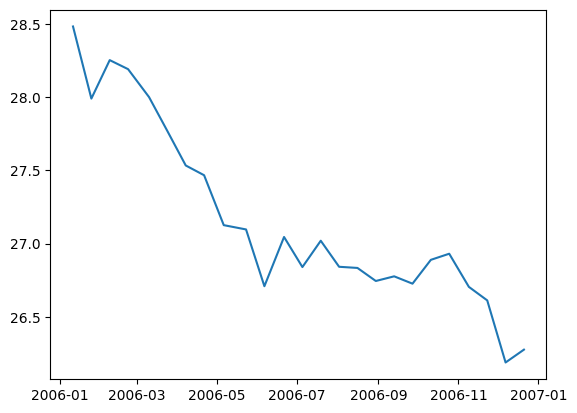

In [31]:
plt.plot(df['Date'], df['USD'])

In [32]:
df = pd.read_csv('JPY.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df[df['Date'].dt.year == 2007].iloc[::-1]
df['JPY'] = df['JPY'].astype('float')

In [33]:
Herst('JPY')

0.4392814206515283

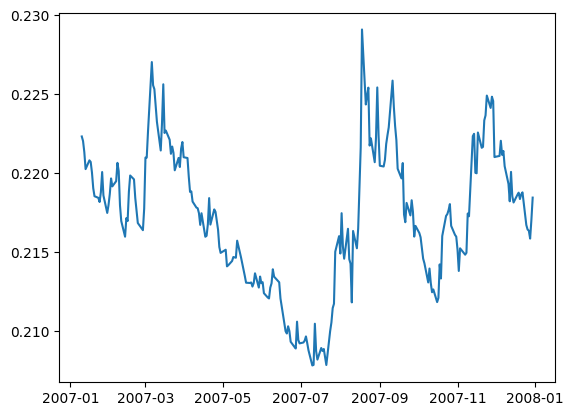

In [34]:
plt.plot(df['Date'], df['JPY'])